In [1]:
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

import statsmodels.api as sm

import dataframe_image as dfi

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
import os

try:
    os.mkdir("../PLOTS/NF_SUBAVG_GENDER")
except:
    print("NF_SUBAVG_GENDER dir exists.")

#For testing, leave commented
swivel = 0
#swivel_order = [2, 1, 7, 3, 16, 6, 12, 9, 10, 4, 5, 15, 8, 14, 20, 0, 22, 13, 19, 11, 18, 21, 17]

desired_file_prefix = "NF_GENDER" 

normalize_data=True

by_year = 1
lnconvert=False
 

NF_SUBAVG_GENDER dir exists.


# FUNCTIONS

In [3]:
def func(x, m, c):
    return (m * x) + c

In [4]:
def color_corr_green(val):
  color = 'green' if val > 0.8 else 'black'
  return 'color: %s' % color

In [5]:
def gen_boxplot():

 case_list = []

 # Create list of data cases
 #
 for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

 print(case_list)

 # Handle one case at a time
 #
 for case in case_list:
        
    #print("case = ",case)
    
    pd_df = pd.DataFrame()
    sel_y = []
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            name = name[0:5] + name[8:]
            #print("8 ",name)
            
            df = pd.DataFrame()
            df[name] = sel_y
            
            #Q1 = df[name].quantile(0.25)
            #Q3 = df[name].quantile(0.75)
            #IQR = Q3 - Q1    #IQR is interquartile range. 

            #filter = (df[name] >= Q1 - 1.5 * IQR) & (df[name] <= Q3 + 1.5 *IQR)
            #print(filter)
            #df = df.loc[filter]
            
            q = df[name].quantile(0.80)
            df = df[df[name] < q]
            
            pd_df = pd.concat([pd_df,df],axis=1)
        
            #print(pd_df)

    # Get occupation
    for code in soc_new_code:
        #print(code[0][0:2])
        if (code[0][0:2].find(case[0:2]) >= 0):
            #print(code[0],code[1])
            ocup = str(code[0]) + " " + str(code[1])
            
    #print(ocup)

    title = desired_file_prefix + " " + ocup + " boxplot " + str(case[3:])
    plt.figure(title,figsize=(10, 10))
    plt.title(title)

    #plt.ylim(0.0, 3e-6)

    pd_df.boxplot()
    plt.xticks(rotation = 90)
    plt.tight_layout()  

    save_title = "../PLOTS/" + desired_file_output + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    plt.show()
    
    #print("HERE")
    #print(df[df['YEAR'].str.contains(name)])
    
    ## ########################## correlations ######################
    
    title = title + "_pearson_corr"

    df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

    df = pd_df.corr(method='pearson')
 
    df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
    save_file = "../PLOTS/" + desired_file_output + title + ".png"
    dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

    save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
    df_corr.to_excel(save_file)

    display(df_styled)        

# ALL CORRELATIONS

In [6]:
# Generate all correlations
#
def gen_corr():

  pd_df = pd.DataFrame()
  sel_y = []
    
  case_list = []

  # Create list of data cases
  #
  for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

  print(case_list)

  # Handle one case at a time
  #
  for case in case_list:
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            
            temp_pd_df = pd.DataFrame()
            temp_pd_df[name] = sel_y
            pd_df = pd.concat([pd_df,temp_pd_df],axis=1)
        
            #print(pd_df)

            # Get occupation
            for code in soc_new_code:
                #print(code[0][0:2])
                if (code[0][0:2].find(case[0:2]) >= 0):
                    #print(code[0],code[1])
                    ocup = str(code[0]) + " " + str(code[1])
            
  #print(ocup)

  title = desired_file_prefix + ocup +" ALL boxplot " + str(case[3:])
  plt.figure(title,figsize=(10, 10))
  plt.title(title)

  #plt.ylim(0.0, 3e-6)

  pd_df.boxplot()
  plt.xticks(rotation = 90)
  plt.tight_layout()  

  save_title = "../PLOTS/" + desired_file_output + title + ".png"
  save_title = save_title.replace(",","")
  save_title = save_title.replace(" ","_")
  plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
  plt.show()
    
  #print("HERE")
  #print(df[df['YEAR'].str.contains(name)])
    
  ## ########################## correlations ######################
    
  title = title + "_pearson_corr"

  df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

  df = pd_df.corr(method='pearson')
 
  df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
  save_file = "../PLOTS/" + desired_file_output + title + ".png"
  dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

  save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
  df_corr.to_excel(save_file)

  display(df_styled)        



# COLLATE THE DATA

In [7]:
lastfound = ""
pcov      = []


no_genericDB_data_dict = {}


ocovper   = []
ocov      = []
lines     = []

global_y_soc1 = []

for ocup_sel in range(1,24):
    
    print("########################################## NEW OCCUPATION ###############################################")
    print("")
    
    for year in range(0,8): 

        print("########################################## NEW YEAR ###############################################")
        desired_file_output = "./NF_SUBAVG_GENDER/NF_GENDER_" + str(2011+year) + "_"    
        %run ./analysis-code-subcat3-avg.ipynb

        #print(global_y_soc1)
    

########################################## NEW OCCUPATION ###############################################

########################################## NEW YEAR ###############################################
SOC_all.csv
global_y_soc1 found.
global_soc1_empty not found....defining
NF_GENDER_GMX_M_all.csv
NF_GENDER_GFX_F_all.csv
dict_keys(['NF_GENDER_GMX_M', 'NF_GENDER_GFX_F'])
code_found: 11-0000:Management Occupations
*gt(adding): NF_GENDER_GMX_M_112000
*gt(adding): NF_GENDER_GMX_M_113000
*gt(adding): NF_GENDER_GMX_M_113120
*gt(adding): NF_GENDER_GMX_M_119000
*gt(adding): NF_GENDER_GMX_M_119110
code_found: 11-0000:Management Occupations
*gt(adding): NF_GENDER_GFX_F_112000
*gt(adding): NF_GENDER_GFX_F_113000
*gt(adding): NF_GENDER_GFX_F_113110
*gt(adding): NF_GENDER_GFX_F_119000
*gt(adding): NF_GENDER_GFX_F_119110
########################################## NEW YEAR ###############################################
SOC_all.csv
global_y_soc1 found.
global_soc1_empty found.
NF_GENDER_GMX_M_al

# SAMPLE STRUCTURE

In [8]:
for i in range(0,10):      #len(global_y_soc1)):
    print(global_y_soc1[i])

['2011_NF_GENDER_GMX_M_111000-Management Occupations', [0.00019437853622923892, 3.194013506114254e-05, 3.194013506114254e-05, 0.00016243840116809637, 0.00016243840116809637]]
['2011_NF_GENDER_GMX_M_112000-Management Occupations', [4.745391494798321e-05, 7.3006022996897245e-06, 7.3006022996897245e-06, 4.0153312648293485e-05, 1.8251505749224311e-06, 3.741558678590984e-05]]
['2011_NF_GENDER_GMX_M_113000-Management Occupations', [0.00021536776784084687, 4.380361379813835e-05, 4.380361379813835e-05, 1.2776054024457018e-05, 1.2776054024457018e-05, 6.935572184705238e-05, 6.935572184705238e-05, 1.4601204599379449e-05, 1.4601204599379449e-05, 1.0950903449534587e-05, 1.0950903449534587e-05, 5.9317393684979014e-05, 5.9317393684979014e-05]]
['2011_NF_GENDER_GMX_M_113120-Management Occupations', [1.8251505749224311e-06, 1.8251505749224311e-06, 3.6503011498448623e-06, 3.6503011498448623e-06]]
['2011_NF_GENDER_GMX_M_119000-Management Occupations', [0.0006123380178864756, 1.7338930461763094e-05, 1.733

In [9]:
print(global_y_soc1[-1])

['2018_NO DATA FOUND-Military Specific Occupations', [0, 0, 0, 0]]


In [10]:
code_list = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if (ucase.find("NO DATA FOUND") < 0):
        if ocup not in code_list:
            code_list.append(ocup)
        
print(code_list)

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']


In [11]:
print( str(global_y_soc1[0][0]).split("_")[1:3]  )

ca = global_y_soc1[0][0].split("_")[1:3]
print(ca[0] + "_" + ca[1])

['NF', 'GENDER']
NF_GENDER


['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']
../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_110000_Management_Occupations_time_plots_.png


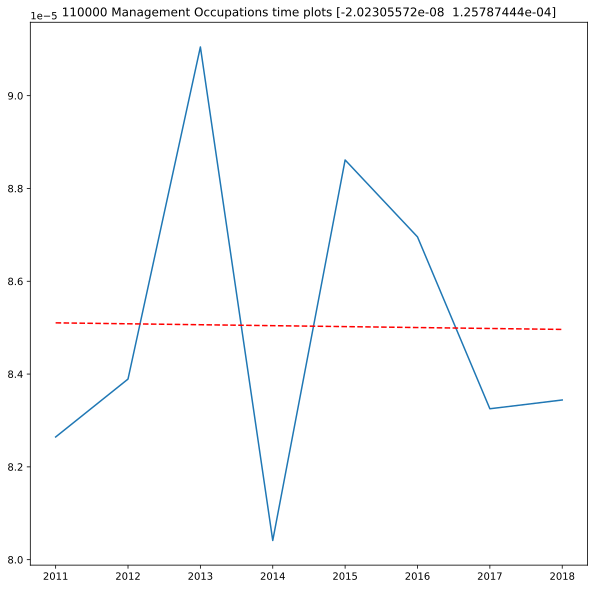

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_130000_Business_and_Financial_Operations_Occupations_time_plots_.png


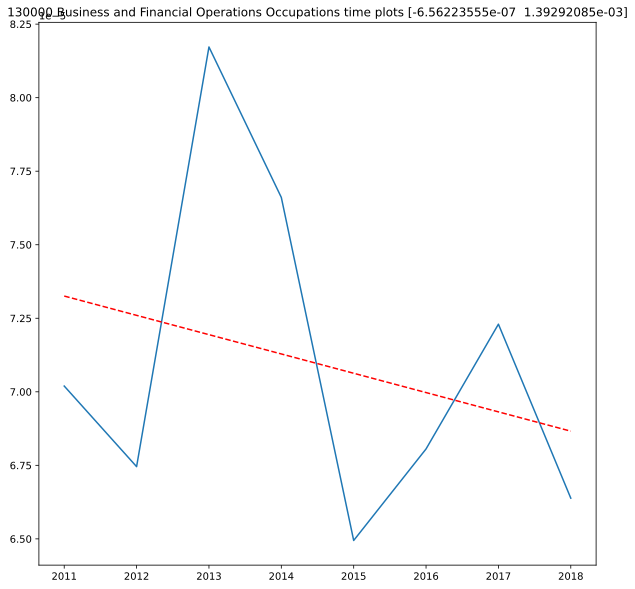

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_150000_Computer_and_Mathematical_Occupations_time_plots_.png


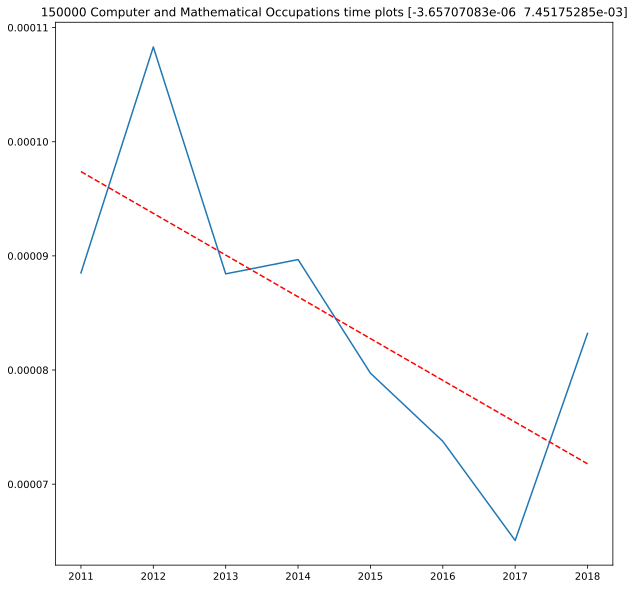

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_170000_Architecture_and_Engineering_Occupations_time_plots_.png


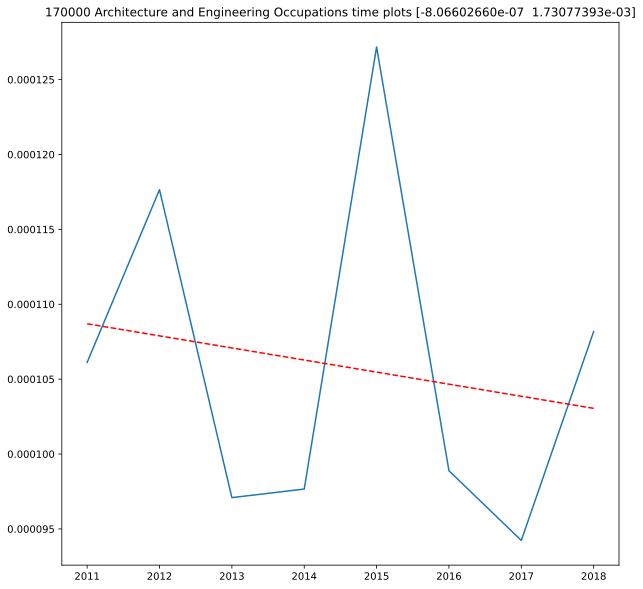

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_190000_Life_Physical_and_Social_Science_Occupations_time_plots_.png


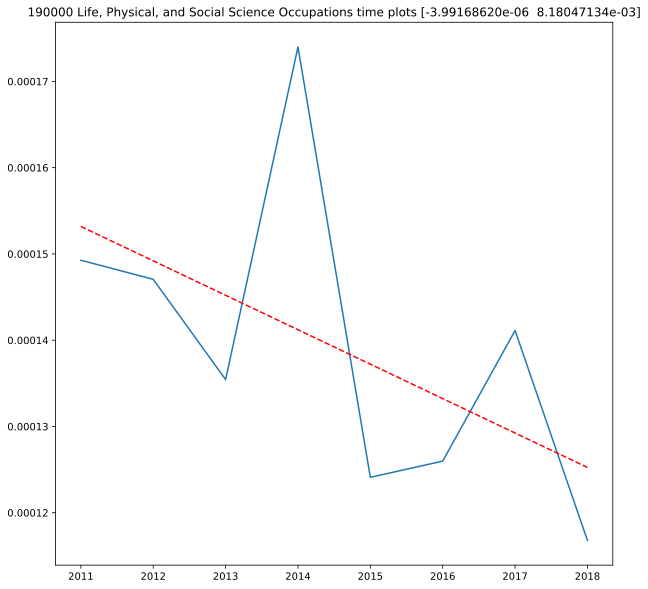

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_210000_Community_and_Social_Service_Occupations_time_plots_.png


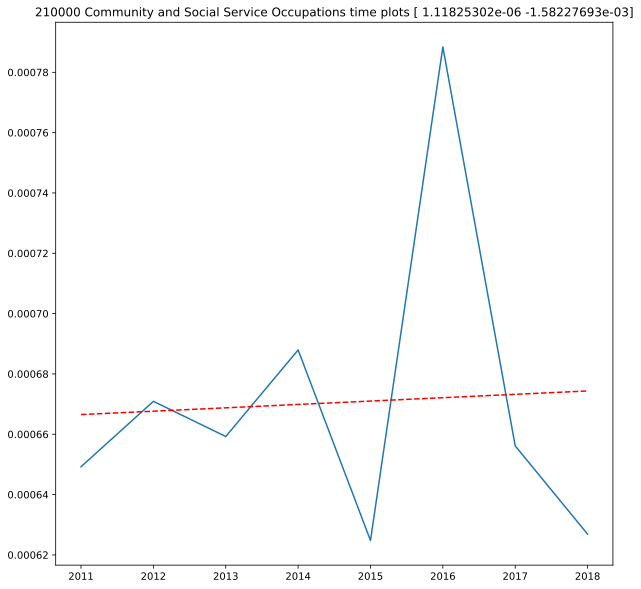

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_230000_Legal_Occupations_time_plots_.png


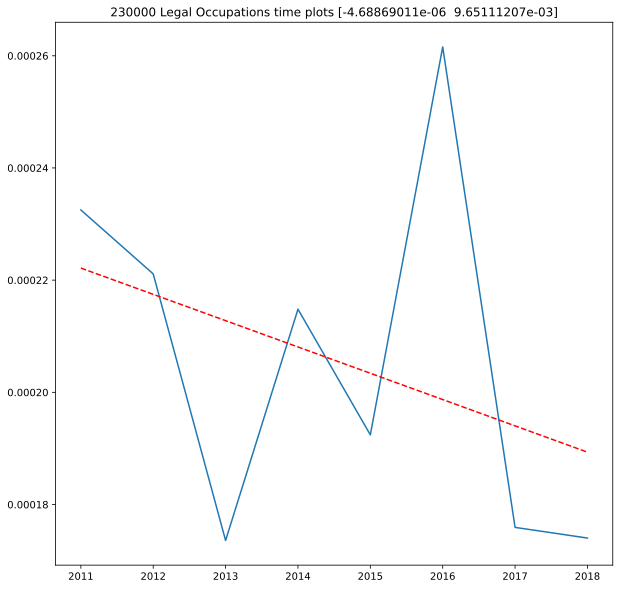

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_250000_Educational_Instruction_and_Library_Occupations_time_plots_.png


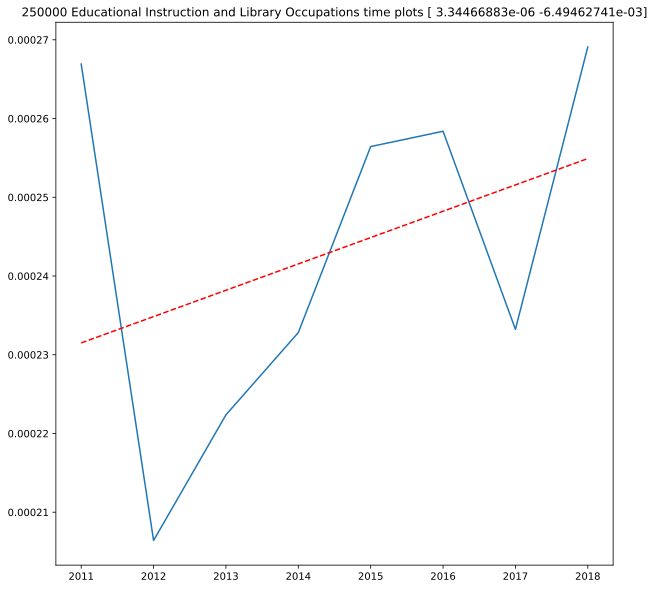

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_270000_Arts_Design_Entertainment_Sports_and_Media_Occupations_time_plots_.png


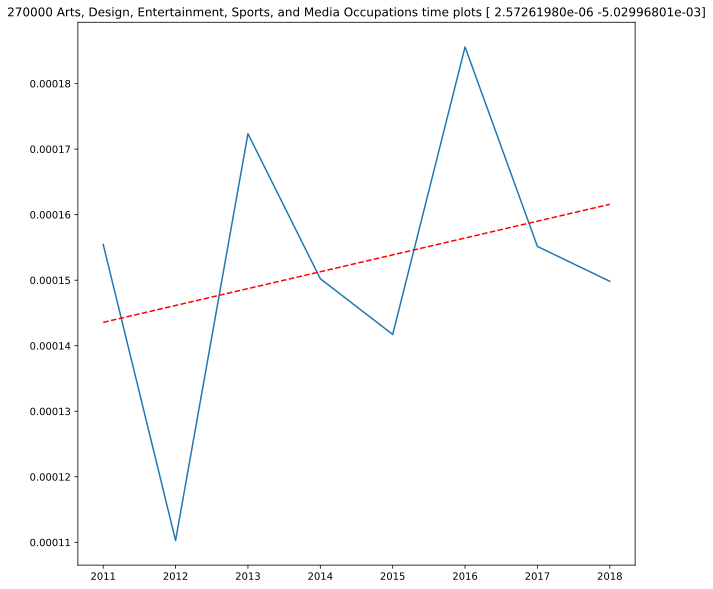

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_290000_Healthcare_Practitioners_and_Technical_Occupations_time_plots_.png


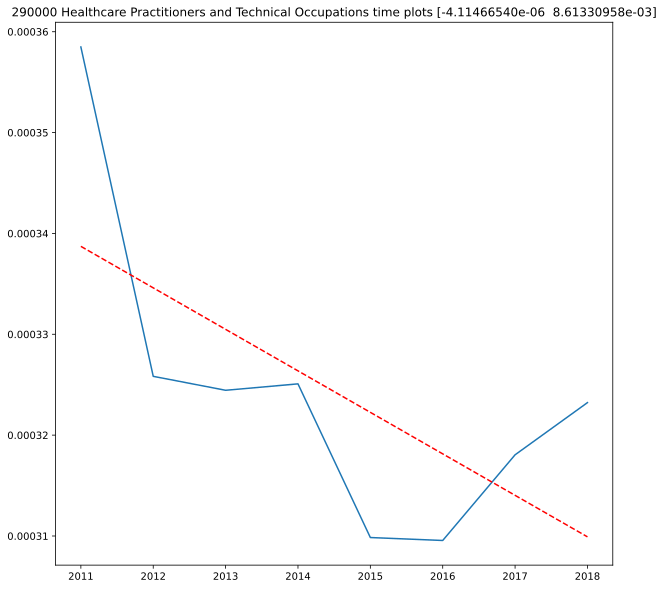

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_310000_Healthcare_Support_Occupations_time_plots_.png


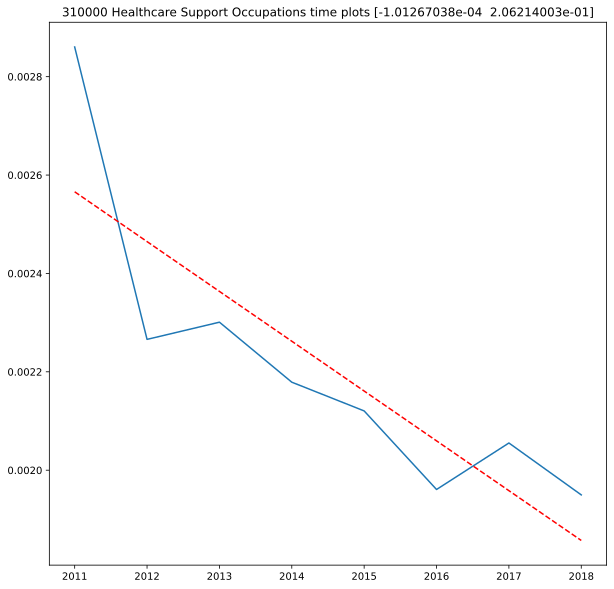

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_330000_Protective_Service_Occupations_time_plots_.png


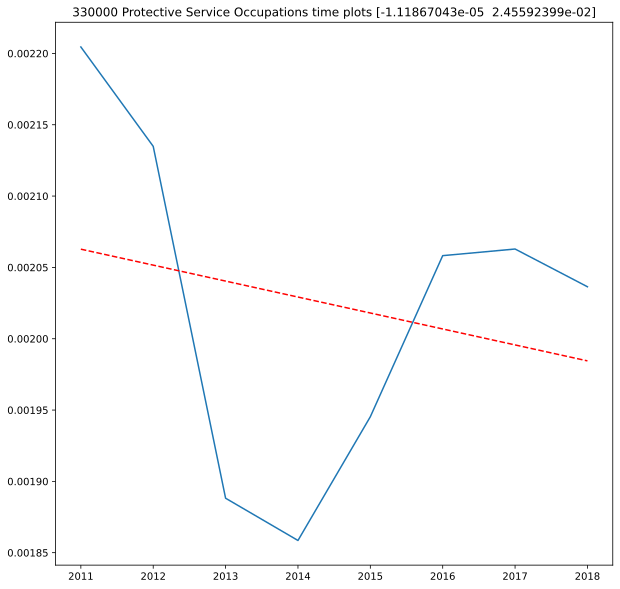

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_350000_Food_Preparation_and_Serving_Related_Occupations_time_plots_.png


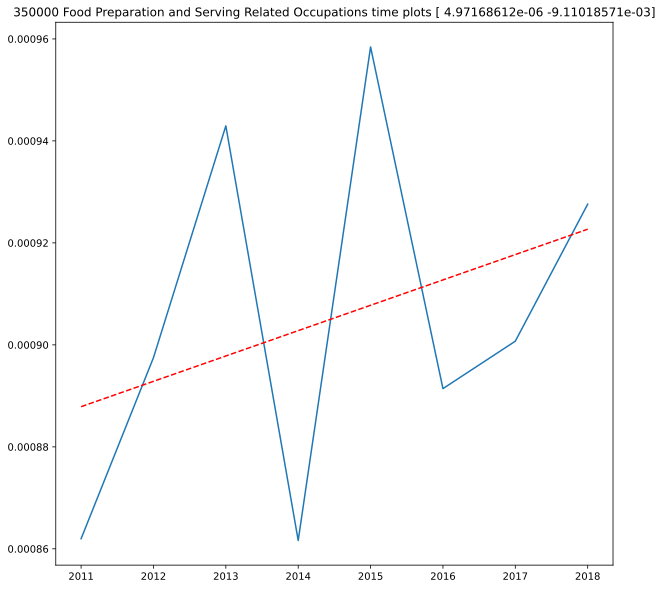

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_370000_Building_and_Grounds_Cleaning_and_Maintenance_Occupations_time_plots_.png


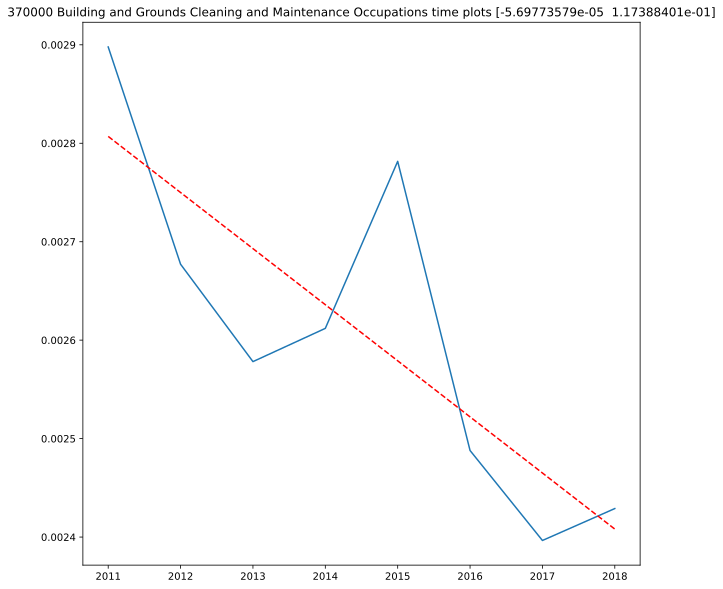

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_390000_Personal_Care_and_Service_Occupations_time_plots_.png


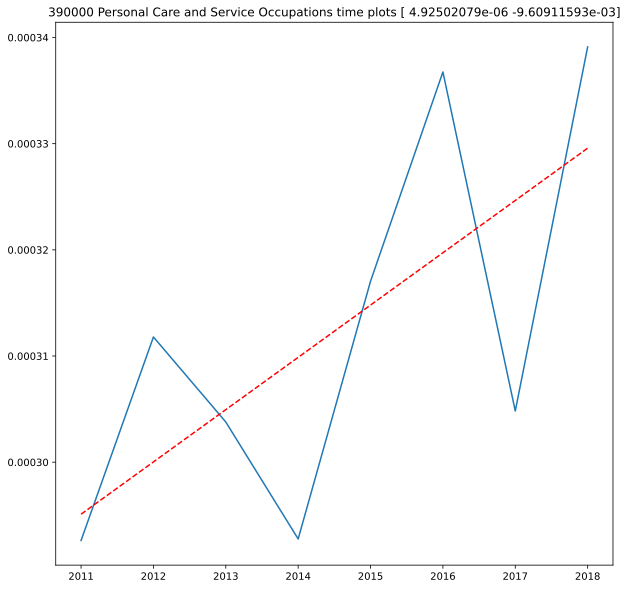

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_410000_Sales_and_Related_Occupations_time_plots_.png


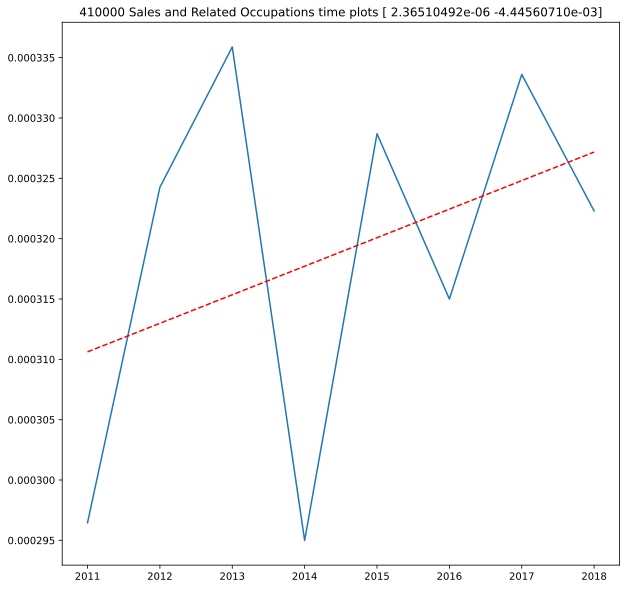

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_430000_Office_and_Administrative_Support_Occupations_time_plots_.png


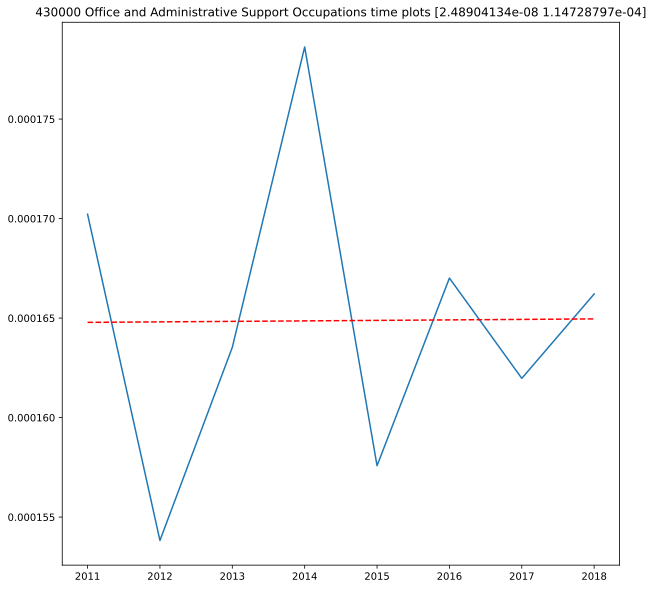

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_450000_Farming_Fishing_and_Forestry_Occupations_time_plots_.png


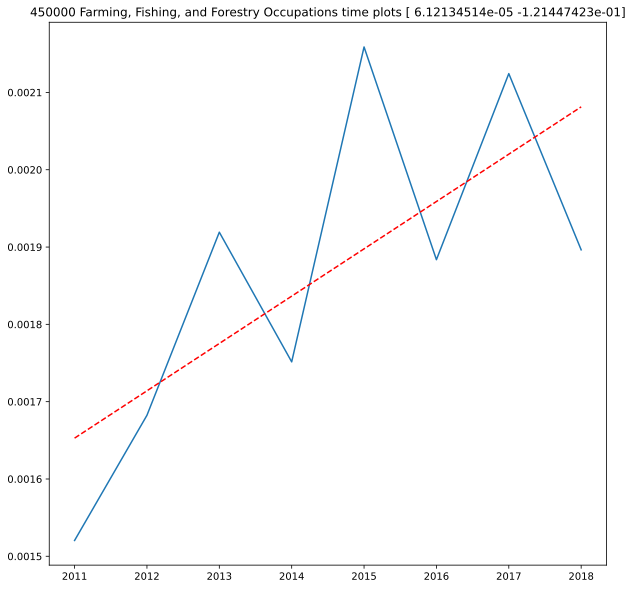

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_470000_Construction_and_Extraction_Occupations_time_plots_.png


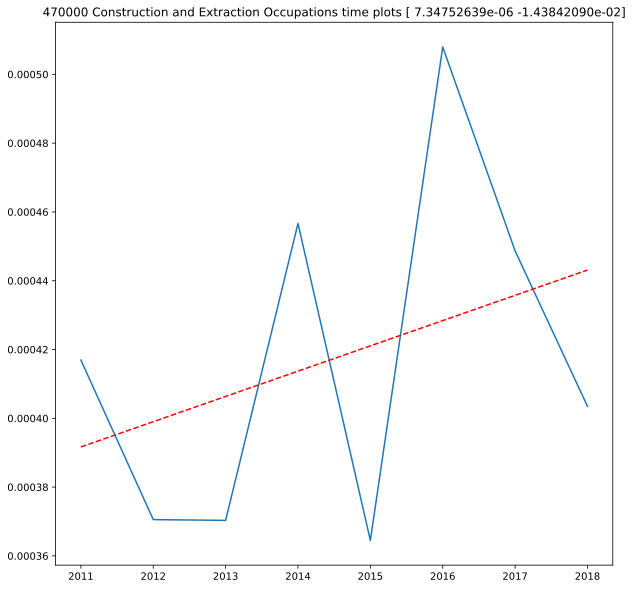

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_490000_Installation_Maintenance_and_Repair_Occupations_time_plots_.png


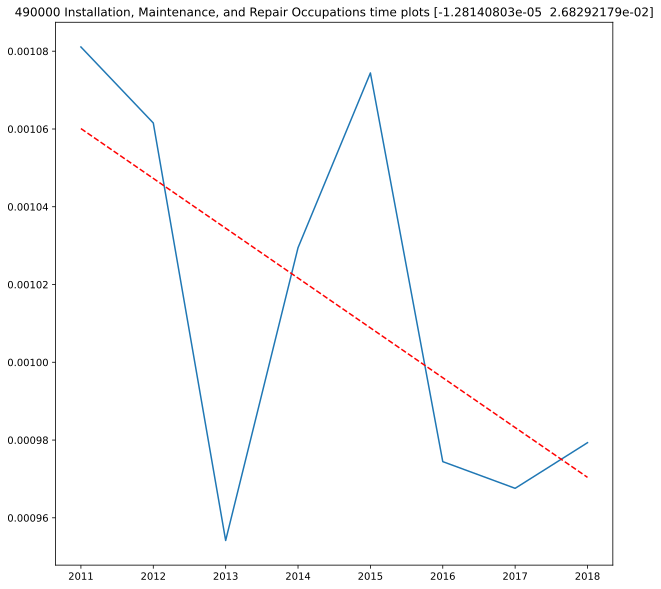

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_510000_Production_Occupations_time_plots_.png


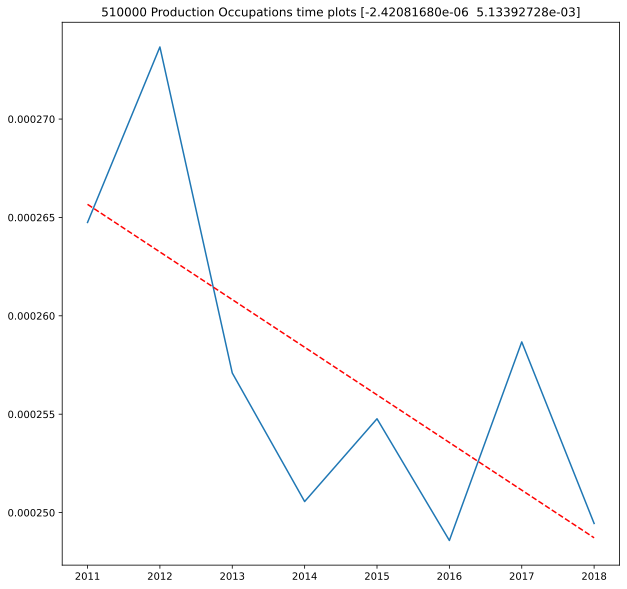

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_530000_Transportation_and_Material_Moving_Occupations_time_plots_.png


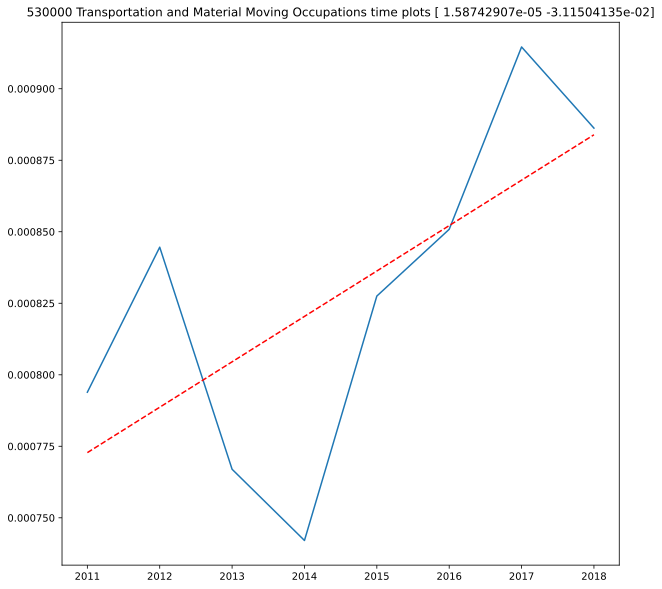

In [12]:
code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if (ucase.find("NO DATA FOUND") < 0):
        if ocup not in code_list:
            code_list.append(ocup)
        
print(code_list)

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    lines.append([use_case, popt])        
        
    #display(popt, pcov)
    
    for ri in range(0+2011,len(x)+2011):
        r.append(func(ri, *popt))
        #print(ri,r)
        
    plt.figure(figsize=(10, 10))
    
    plt.plot(x,y)
    plt.plot(x,r, 'r--')
    
    title = " time plots "
    
    plt.title(use_case + title + str(popt))    
    
    save_title = "../PLOTS/" + desired_file_output + use_case + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    print(save_title)
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    plt.show()
    #plt.close()

In [13]:
for i in range(0,len(lines)):
    print(" y = {0: 1.8f} x + {1: 1.8f}  : {2} ".format(lines[i][1][0], lines[i][1][1], lines[i][0]))
    

 y = -0.00000002 x +  0.00012579  : 110000 Management Occupations 
 y = -0.00000066 x +  0.00139292  : 130000 Business and Financial Operations Occupations 
 y = -0.00000366 x +  0.00745175  : 150000 Computer and Mathematical Occupations 
 y = -0.00000081 x +  0.00173077  : 170000 Architecture and Engineering Occupations 
 y = -0.00000399 x +  0.00818047  : 190000 Life, Physical, and Social Science Occupations 
 y =  0.00000112 x + -0.00158228  : 210000 Community and Social Service Occupations 
 y = -0.00000469 x +  0.00965111  : 230000 Legal Occupations 
 y =  0.00000334 x + -0.00649463  : 250000 Educational Instruction and Library Occupations 
 y =  0.00000257 x + -0.00502997  : 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
 y = -0.00000411 x +  0.00861331  : 290000 Healthcare Practitioners and Technical Occupations 
 y = -0.00010127 x +  0.20621400  : 310000 Healthcare Support Occupations 
 y = -0.00001119 x +  0.02455924  : 330000 Protective Service Occupations

# CALC COV 

In [14]:
cov_array = []

code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if (ucase.find("NO DATA FOUND") < 0):
        if ocup not in code_list:
            code_list.append(ocup)
        
print(code_list)

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    #ca = global_y_soc1[0][0].split("_")[1:3]
    #use_case = ca[0] + "_" + ca[1] + ocup + "0000"
                   
    omean = np.array(y).mean()
    ostd  = np.array(y).std()
    ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case,ocov)
    
    if (ocov >= 0):
        cov_array.append([str(use_case),ocov])

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']
110000 Management Occupations 0.038733101503484545
130000 Business and Financial Operations Occupations 0.07522016298686826
150000 Computer and Mathematical Occupations 0.1412578978033124
170000 Architecture and Engineering Occupations 0.10165441141184849
190000 Life, Physical, and Social Science Occupations 0.1216966194024911
210000 Community and Social Service Occupations 0.07266064946754963
230000 Legal Occupations 0.14640734822029633
250000 Educational Instruction and Library Occupations 0.08762627407257687
270000 Arts, Design, Entertainment, Sports, and Media Occupations 0.1354153249419501
290000 Healthcare Practitioners and Technical Occupations 0.04412351205181125
310000 Healthcare Support Occupations 0.12353525257408779
330000 Protective Service Occupations 0.05517356917914819
350000 Food Preparation and Serving Related Occup

In [15]:
test_list = cov_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0311797 	 510000 Production Occupations 
0.0366218 	 350000 Food Preparation and Serving Related Occupations 
0.0387331 	 110000 Management Occupations 
0.0433913 	 430000 Office and Administrative Support Occupations 
0.0441235 	 290000 Healthcare Practitioners and Technical Occupations 
0.0461329 	 410000 Sales and Related Occupations 
0.0481753 	 490000 Installation, Maintenance, and Repair Occupations 
0.0535275 	 390000 Personal Care and Service Occupations 
0.0551736 	 330000 Protective Service Occupations 
0.0622840 	 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.0660687 	 530000 Transportation and Material Moving Occupations 
0.0726606 	 210000 Community and Social Service Occupations 
0.0752202 	 130000 Business and Financial Operations Occupations 
0.0876263 	 250000 Educational Instruction and Library Occupations 
0.1016544 	 170000 Architecture and Engineering Occupations 
0.1075787 	 450000 Farming, Fishing, and Forestry Occupations 
0.1140360 	 470

# MEAN

In [16]:
mean_array = []

code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if (ucase.find("NO DATA FOUND") < 0):
        if ocup not in code_list:
            code_list.append(ocup)
        
print(code_list)

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    #ca = global_y_soc1[0][0].split("_")[1:3]
    #use_case = ca[0] + "_" + ca[1] + ocup + "0000"
                   
    omean = np.array(y).mean()
    #ostd  = np.array(y).std()
    #ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case,omean)
    
    if (omean >= 0):
        mean_array.append([str(use_case),omean])

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']
110000 Management Occupations 8.503298688771728e-05
130000 Business and Financial Operations Occupations 7.095850320927593e-05
150000 Computer and Mathematical Occupations 8.458367460950511e-05
170000 Architecture and Engineering Occupations 0.0001058728759803987
190000 Life, Physical, and Social Science Occupations 0.000139219489832202
210000 Community and Social Service Occupations 0.0006704437718924791
230000 Legal Occupations 0.00020574584419585023
250000 Educational Instruction and Library Occupations 0.00024320795319840988
270000 Arts, Design, Entertainment, Sports, and Media Occupations 0.0001525745762402267
290000 Healthcare Practitioners and Technical Occupations 0.0003243161370476732
310000 Healthcare Support Occupations 0.002211553921758108
330000 Protective Service Occupations 0.0020236241453013056
350000 Food Preparation

In [17]:
test_list = mean_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0000710 	 130000 Business and Financial Operations Occupations 
0.0000846 	 150000 Computer and Mathematical Occupations 
0.0000850 	 110000 Management Occupations 
0.0001059 	 170000 Architecture and Engineering Occupations 
0.0001392 	 190000 Life, Physical, and Social Science Occupations 
0.0001526 	 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.0001649 	 430000 Office and Administrative Support Occupations 
0.0002057 	 230000 Legal Occupations 
0.0002432 	 250000 Educational Instruction and Library Occupations 
0.0002572 	 510000 Production Occupations 
0.0003123 	 390000 Personal Care and Service Occupations 
0.0003189 	 410000 Sales and Related Occupations 
0.0003243 	 290000 Healthcare Practitioners and Technical Occupations 
0.0004174 	 470000 Construction and Extraction Occupations 
0.0006704 	 210000 Community and Social Service Occupations 
0.0008283 	 530000 Transportation and Material Moving Occupations 
0.0009053 	 350000 Food Preparation and Serv

# COV LEVEL 3

In [18]:
code_list = []
soc_level = 3

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-5 + soc_level]
    #print(ocup)
    if (ucase.find("NO DATA FOUND") < 0):
        if ocup not in code_list:
            code_list.append(ocup)
        
print(code_list)

['_1110', '_1120', '_1130', '_1131', '_1190', '_1191', '_1310', '_1311', '_1320', '_1511', '_1520', '_1710', '_1720', '_1721', '_1730', '_1910', '_1920', '_1930', '_1940', '_2110', '_2120', '_2310', '_2320', '_2510', '_2511', '_2520', '_2530', '_2540', '_2590', '_2710', '_2720', '_2730', '_2740', '_2910', '_2911', '_2920', '_2990', '_3110', '_3120', '_3190', '_3310', '_3320', '_3330', '_3390', '_3510', '_3520', '_3530', '_3590', '_3710', '_3720', '_3730', '_3910', '_3920', '_3930', '_3940', '_3950', '_3960', '_3970', '_3990', '_4110', '_4120', '_4130', '_4140', '_4190', '_4310', '_4320', '_4330', '_4340', '_4341', '_4350', '_4351', '_4360', '_4390', '_4391', '_4510', '_4520', '_4530', '_4540', '_4710', '_4720', '_4721', '_4722', '_4730', '_4740', '_4750', '_4910', '_4920', '_4930', '_4990', '_5110', '_5120', '_5130', '_5140', '_5141', '_5151', '_5160', '_5170', '_5180', '_5190', '_5191', '_5310', '_5320', '_5330', '_5340', '_5350', '_5360', '_5370', '_5371']


In [19]:
cov_array = []

lines     = []

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:(-5 + soc_level)] + ("0"*(5-soc_level)) + " " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
                   
    omean = np.array(y).mean()
    ostd  = np.array(y).std()
    ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case, ocov)
    
    if (ocov >= 0):
        cov_array.append([str(use_case),ocov])

111000 Management Occupations 0.16623344179275565
112000 Management Occupations 0.18537361523508472
113000 Management Occupations 0.0845977420875055
113100 Management Occupations 0.33972114838628625
119000 Management Occupations 0.12206474526296765
119100 Management Occupations 0.12784109982449282
131000 Business and Financial Operations Occupations 0.11429773135380815
131100 Business and Financial Operations Occupations 0.14077762273691605
132000 Business and Financial Operations Occupations 0.14113246665057896
151100 Computer and Mathematical Occupations 0.13988366167242045
152000 Computer and Mathematical Occupations 0.5507547439686261
171000 Architecture and Engineering Occupations 0.5196752344916663
172000 Architecture and Engineering Occupations 0.22185086976054097
172100 Architecture and Engineering Occupations 0.2783070306525972
173000 Architecture and Engineering Occupations 0.11203250096793205
191000 Life, Physical, and Social Science Occupations 0.1091013888019645
192000 Lif

In [20]:
test_list = cov_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0198070 	 352000 Food Preparation and Serving Related Occupations 
0.0298251 	 533000 Transportation and Material Moving Occupations 
0.0417996 	 292000 Healthcare Practitioners and Technical Occupations 
0.0446878 	 513000 Production Occupations 
0.0446991 	 412000 Sales and Related Occupations 
0.0469276 	 512000 Production Occupations 
0.0546457 	 291000 Healthcare Practitioners and Technical Occupations 
0.0582050 	 399000 Personal Care and Service Occupations 
0.0582115 	 499000 Installation, Maintenance, and Repair Occupations 
0.0584091 	 411000 Sales and Related Occupations 
0.0632017 	 435000 Office and Administrative Support Occupations 
0.0641187 	 519000 Production Occupations 
0.0648773 	 332000 Protective Service Occupations 
0.0694889 	 339000 Protective Service Occupations 
0.0707402 	 353000 Food Preparation and Serving Related Occupations 
0.0707885 	 211000 Community and Social Service Occupations 
0.0710718 	 514000 Production Occupations 
0.0726384 	 516000 Produ

# VARIANCE ACROSS GENDER

In [21]:
def get_case_list(soc_level, desired_case):
    code_list = []

    #soc_level = 1
    #desired_case = "16to19"

    global global_y_soc1
    
    for i in range(0,len(global_y_soc1)):
        ucase = str(global_y_soc1[i][0]).split('-')[0]
        #print(ucase)
        
        if (ucase.find("NO DATA FOUND") < 0):
            ocup    = "_" + desired_case + "_" + ucase[-6:-5 + soc_level]
            #print(ocup)
            if ocup not in code_list:
                code_list.append(ocup)
                #if (str(ocup[1:]).isnumeric()):
                #    code_list.append(ocup)
        
    #print(code_list)
    
    return(code_list)

In [22]:
#soc_level = 1
#desired_case = "16to19"
#
#get_case_list(soc_level, desired_case)

In [23]:
cases = ["GMX_M","GFX_F"]

mult_array = []

for desired_case in cases:

    soc_level = 1
    #desired_case = "16to19"

    code_list = get_case_list(soc_level, desired_case)

    cov_array = []

    for i in range(0,len(code_list)):
      
        ocup    = str(code_list[i])
    
        x = []
        y = []

        for yr in range(2011,2019):
        
            tmp_lst = []
        
            for j in range(0,len(global_y_soc1)):
        
                year = str(yr)
                case = global_y_soc1[j][0]
            
                #print(year,ocup, case)
        
                if (case.find(year) >= 0) and (case.find(ocup) >=0):
                    tmp =  global_y_soc1[j][0].split('-')
                    use_ocup = tmp[0][-6:(-5 + soc_level)] + ("0"*(5-soc_level)) + " " + tmp[1]
                    tmp = tmp[0].split('_')
                    use_var  = str(tmp[1]) + "_" + str(tmp[2])
                    #use_case = use_var + " " + use_ocup
                    use_case = use_ocup
                    #print(use_case)
                
                    data = global_y_soc1[j][1]
                    #print(year,ocup,case,data)
                
                    # add up all the years for the same occupation level from code_list)
                    tmp_lst = tmp_lst +  data
      
    
            occupation = str(ocup[1:]) + "0000"
        
            #print(tmp_lst)
            if (len(tmp_lst) == 0):
                mean = 0.0
            else:
                omean = np.array(tmp_lst).mean()
            
            #print(year,occupation,omean)
            #print(" ")
        
            x.append(yr)
            y.append(omean)
        
        #print(x,y)
                   
        omean = np.array(y).mean()
        ostd  = np.array(y).std()
        ocov  = ostd/omean 
    
        if math.isnan(ocov):
            ocov = 0.0
        
        ocov_case = desired_case + " " + use_case
    
        #ocov.append(str(use_case),ocov)
        #print(ocov_case, ocov)

        cov_array.append([str(ocov_case),ocov])
        
    mult_array.append([str(desired_case),cov_array])
    
    # SORT LIST
    
    #test_list = cov_array.copy()
    
    # sort list of list
    # sort by second index
    #test_list.sort(key = lambda test_list: test_list[1])
 
    # printing result
    #for i in range(0,len(test_list)):
        #print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0]))) 
        
    for i in range(0,len(cov_array)):
        print("{0:1.7f} \t {1:} ".format(cov_array[i][1], str(cov_array[i][0]))) 

    print(" ")

0.1321866 	 GMX_M 110000 Management Occupations 
0.0956872 	 GMX_M 130000 Business and Financial Operations Occupations 
0.2328153 	 GMX_M 150000 Computer and Mathematical Occupations 
0.0717337 	 GMX_M 170000 Architecture and Engineering Occupations 
0.1756250 	 GMX_M 190000 Life, Physical, and Social Science Occupations 
0.1369033 	 GMX_M 210000 Community and Social Service Occupations 
0.3441945 	 GMX_M 230000 Legal Occupations 
0.1712646 	 GMX_M 250000 Educational Instruction and Library Occupations 
0.2342250 	 GMX_M 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.0338976 	 GMX_M 290000 Healthcare Practitioners and Technical Occupations 
0.1068486 	 GMX_M 310000 Healthcare Support Occupations 
0.0490206 	 GMX_M 330000 Protective Service Occupations 
0.0471515 	 GMX_M 350000 Food Preparation and Serving Related Occupations 
0.0622122 	 GMX_M 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.0927024 	 GMX_M 390000 Personal Care and Service Occu

In [24]:
print(len(mult_array))

2


../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_Coef_by_AGE.png


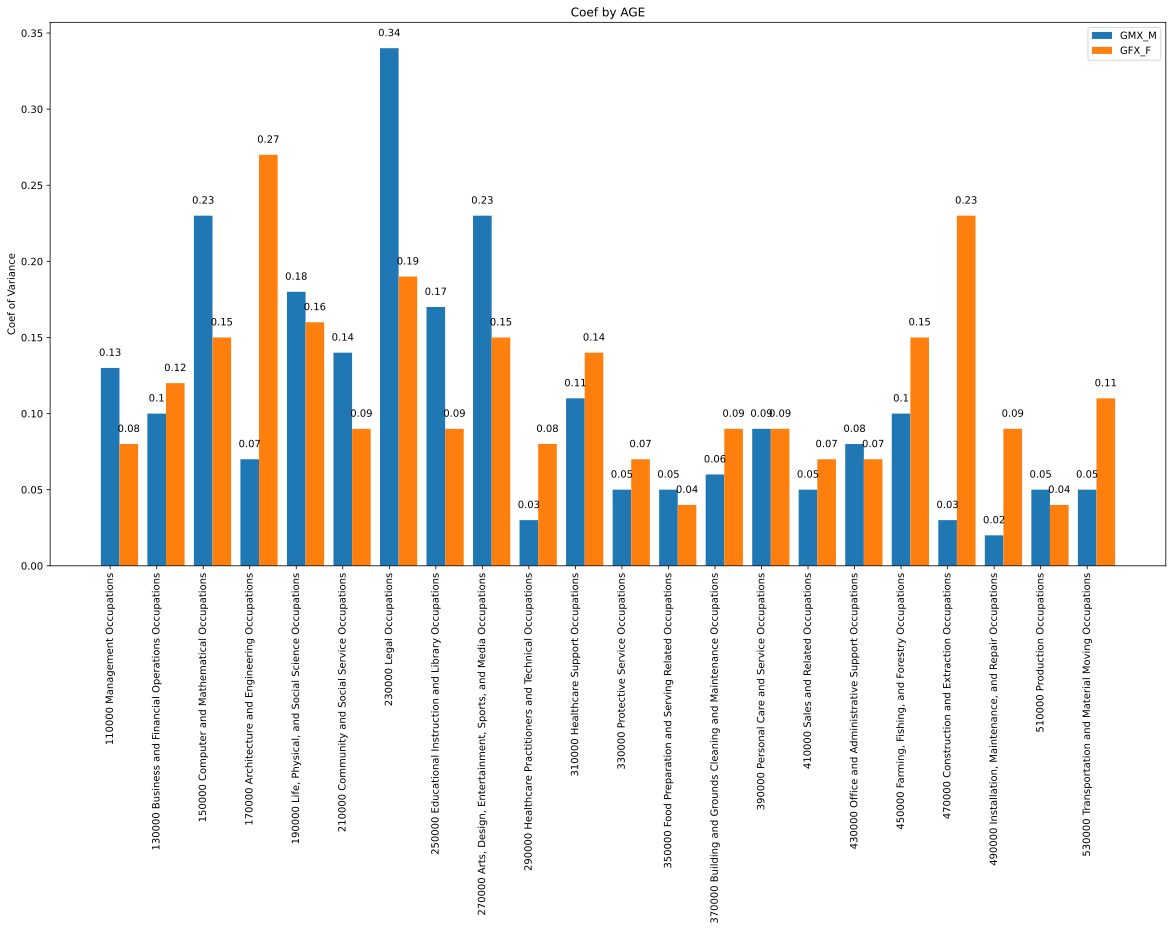

In [25]:
labels = []
for i in range(0,len(mult_array[0][1])):
    line = mult_array[0][1][i]
    larr = str(line[0]).split(" ")
    lbl  = ""
    for j in range(0,len(larr[1:])):
        lbl = lbl + " " + str(larr[1+j])
                              
    labels.append(lbl)

groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        val = round(val,2)
        subgrp.append(val)

    #print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)
    
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

rects = []

fig, ax = plt.subplots(figsize=(20, 10))

for i in range(0,len(grpd)):
    tmp_rect = ax.bar(x+i*(width), grpd[i], width, label=grpl[i])
    rects.append(tmp_rect)


title = "Coef by AGE"
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Coef of Variance')
ax.set_title(title)
ax.set_xticks(x, labels, rotation=90)
ax.legend()

#ax.set_ylim(0, 0.25)

for i in range(0,len(grpd)):
    ax.bar_label(rects[i], padding=10)

#fig.tight_layout() 
    
save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
print(save_title)
plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
plt.show()
#plt.close()
    


# MEAN

In [28]:
cases = ["GMX_M", "GFX_F"]

mult_array = []

for desired_case in cases:

    soc_level = 1
    #desired_case = "16to19"

    code_list = get_case_list(soc_level, desired_case)

    mean_array = []

    for i in range(0,len(code_list)):
      
        ocup    = str(code_list[i])
    
        x = []
        y = []

        for yr in range(2011,2019):
        
            tmp_lst = []
        
            for j in range(0,len(global_y_soc1)):
        
                year = str(yr)
                case = global_y_soc1[j][0]
            
                #print(year,ocup, case)
        
                if (case.find(year) >= 0) and (case.find(ocup) >=0):
                    tmp =  global_y_soc1[j][0].split('-')
                    use_ocup = tmp[0][-6:(-5 + soc_level)] + ("0"*(5-soc_level)) + " " + tmp[1]
                    tmp = tmp[0].split('_')
                    use_var  = str(tmp[1]) + "_" + str(tmp[2])
                    #use_case = use_var + " " + use_ocup
                    use_case = use_ocup
                    #print(use_case)
                
                    data = global_y_soc1[j][1]
                    #print(year,ocup,case,data)
                
                    # add up all the years for the same occupation level from code_list)
                    tmp_lst = tmp_lst +  data
      
    
            occupation = str(ocup[1:]) + "0000"
        
            #print(tmp_lst)
            if (len(tmp_lst) == 0):
                mean = 0.0
            else:
                omean = np.array(tmp_lst).mean()
            
            #print(year,occupation,omean)
            #print(" ")
        
            x.append(yr)
            y.append(omean)
        
        #print(x,y)
                   
        omean = np.array(y).mean()
        #ostd  = np.array(y).std()
        #ocov  = ostd/omean 
    
        if math.isnan(omean):
            ocov = 0.0
        
        omean_case = desired_case + " " + use_case
    
        #ocov.append(str(use_case),ocov)
        #print(ocov_case, ocov)

        mean_array.append([str(omean_case),omean])
        
    mult_array.append([str(desired_case),mean_array])
    
    # SORT LIST
    
    #test_list = cov_array.copy()
    
    # sort list of list
    # sort by second index
    #test_list.sort(key = lambda test_list: test_list[1])
 
    # printing result
    #for i in range(0,len(test_list)):
        #print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0]))) 
        
    for i in range(0,len(mean_array)):
        print("{0:1.7f} \t {1:} ".format(mean_array[i][1], str(mean_array[i][0]))) 

    print(" ")

0.0000601 	 GMX_M 110000 Management Occupations 
0.0000532 	 GMX_M 130000 Business and Financial Operations Occupations 
0.0000636 	 GMX_M 150000 Computer and Mathematical Occupations 
0.0000882 	 GMX_M 170000 Architecture and Engineering Occupations 
0.0001352 	 GMX_M 190000 Life, Physical, and Social Science Occupations 
0.0005857 	 GMX_M 210000 Community and Social Service Occupations 
0.0000812 	 GMX_M 230000 Legal Occupations 
0.0001741 	 GMX_M 250000 Educational Instruction and Library Occupations 
0.0001857 	 GMX_M 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.0003121 	 GMX_M 290000 Healthcare Practitioners and Technical Occupations 
0.0022458 	 GMX_M 310000 Healthcare Support Occupations 
0.0022017 	 GMX_M 330000 Protective Service Occupations 
0.0008471 	 GMX_M 350000 Food Preparation and Serving Related Occupations 
0.0024938 	 GMX_M 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.0003203 	 GMX_M 390000 Personal Care and Service Occu

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_Mean_Injury_per_10000_by_AGE.png


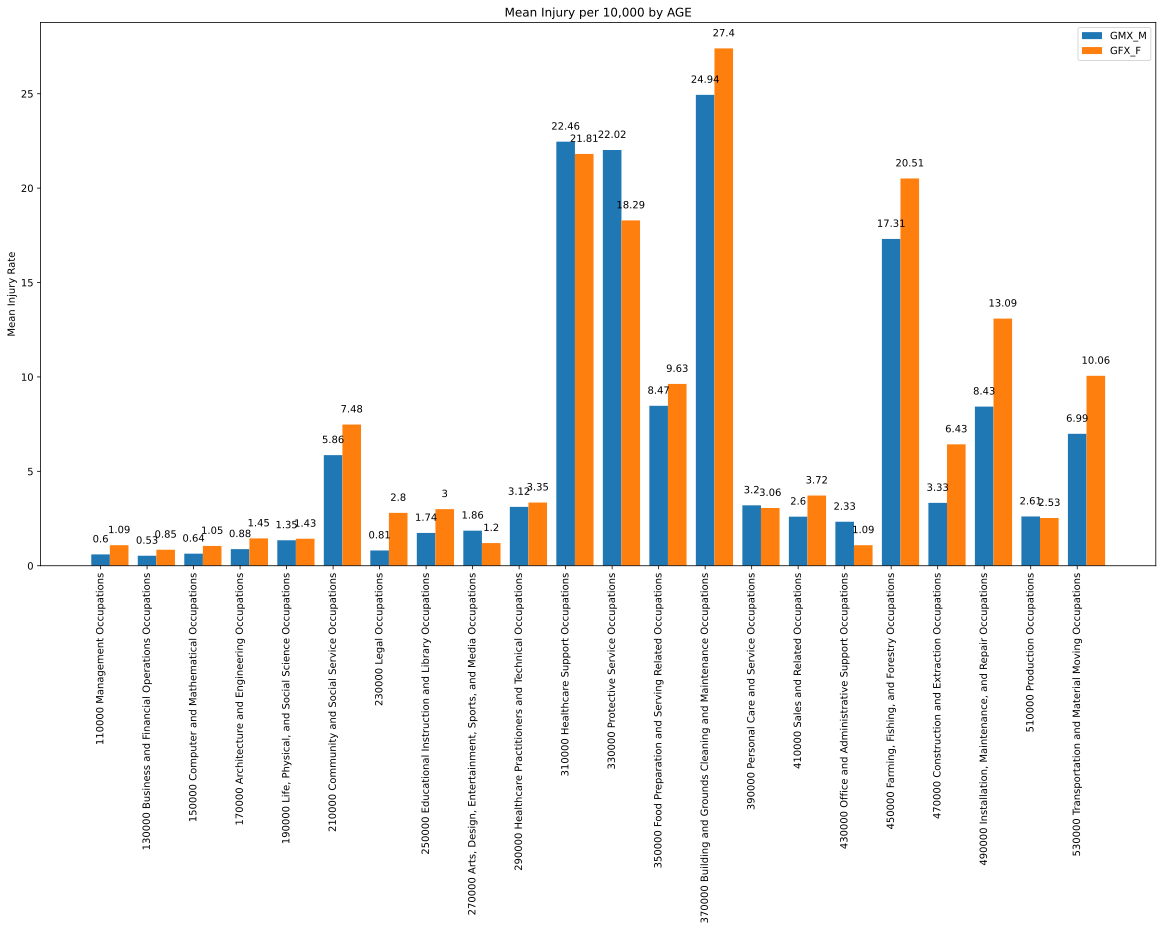

In [29]:
labels = []
for i in range(0,len(mult_array[0][1])):
    line = mult_array[0][1][i]
    larr = str(line[0]).split(" ")
    lbl  = ""
    for j in range(0,len(larr[1:])):
        lbl = lbl + " " + str(larr[1+j])
                              
    labels.append(lbl)

groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        
        val = round(10000*val,2)
        
        subgrp.append(val)

    #print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)
    
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

rects = []

fig, ax = plt.subplots(figsize=(20, 10))

for i in range(0,len(grpd)):
    tmp_rect = ax.bar(x+i*(width), grpd[i], width, label=grpl[i])
    rects.append(tmp_rect)

    
title = "Mean Injury per 10,000 by AGE"
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Injury Rate')
ax.set_title(title)
ax.set_xticks(x, labels, rotation=90)
ax.legend()

#ax.set_ylim(0, 0.25)

for i in range(0,len(grpd)):
    ax.bar_label(rects[i], padding=10)

#fig.tight_layout() 
    
save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
print(save_title)
plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
plt.show()
#plt.close()



# T TEST TWO DISTRIBUTIONS

In [30]:
import scipy.stats as stats

In [31]:
data_group1 = grpd[0]
data_group2 = grpd[1]

stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=-0.36801594672531396, pvalue=0.7147096438889413)


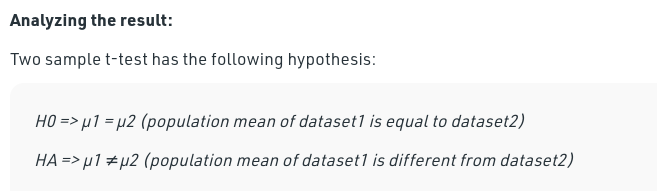


#### Since the p-value (0.7147) is greater than alpha = 0.05 so we CANNOT reject
#### the null hypothesis of the test. We do NOT have sufficient evidence to say that the
#### mean fatality probability across occupational groups is different.